# Wasserstein-based clustering

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wkmeans import WKMeans
from MAslope import ma_slope

In [2]:
# Data
df = pd.read_parquet("btc_binance_1d.parquet")
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060


In [3]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060
...,...,...,...,...,...
2026-01-20,92630.99,92870.00,87895.98,88427.66,22007.326100
2026-01-21,88427.66,90574.00,87263.53,89454.73,20617.503720
2026-01-22,89454.73,90359.99,88515.37,89559.67,10825.504920


In [4]:
# The number of clusters
k = 2

# Log returns
df['Returns'] = np.log(df['Close'] / df['Close'].shift())

for i in [7, 14, 21, 30]:
    df = ma_slope(df, ma_type='EMA', length=i, slope_mode='Normalized', col_name=f'slope_{i}')



In [7]:
df.dropna(inplace=True)
df

,Open,High,Low,Close,Volume,Returns,slope_7,slope_14,slope_21,slope_30
Date,,,,,,,,,,
2017-09-16,3674.01,3950.00,3470.66,3714.95,1297.563953,0.004032,-1.073904,-1.195123,-0.977491,-0.757684
2017-09-17,3685.23,3748.21,3499.02,3699.99,682.171210,-0.004035,-0.911085,-1.097203,-0.930232,-0.737324
2017-09-18,3690.00,4123.20,3690.00,4035.01,1030.006455,0.086679,1.495757,0.169982,-0.099188,-0.168323
2017-09-19,4060.00,4089.97,3830.91,3910.04,902.332129,-0.031461,0.311813,-0.270929,-0.370303,-0.353649
2017-09-20,3910.04,4046.08,3820.00,3900.00,720.935076,-0.002571,0.168780,-0.269161,-0.360412,-0.347754
...,...,...,...,...,...,...,...,...,...,...
2026-01-20,92630.99,92870.00,87895.98,88427.66,22007.326100,-0.046439,-1.477784,-0.686893,-0.401929,-0.252542
2026-01-21,88427.66,90574.00,87263.53,89454.73,20617.503720,0.011548,-0.837802,-0.449368,-0.264743,-0.164329
2026-01-22,89454.73,90359.99,88515.37,89559.67,10825.504920,0.001172,-0.603380,-0.375674,-0.230825,-0.146553


In [8]:
# Features computation
df_features = pd.DataFrame(index=df.index)
df_features = df[['Returns', 'slope_7','slope_14','slope_21','slope_30']]
df_features.dropna(inplace=True)

In [9]:
df_features.head()

,Returns,slope_7,slope_14,slope_21,slope_30
Date,,,,,
2017-09-16,0.004032,-1.073904,-1.195123,-0.977491,-0.757684
2017-09-17,-0.004035,-0.911085,-1.097203,-0.930232,-0.737324
2017-09-18,0.086679,1.495757,0.169982,-0.099188,-0.168323
2017-09-19,-0.031461,0.311813,-0.270929,-0.370303,-0.353649
2017-09-20,-0.002571,0.168780,-0.269161,-0.360412,-0.347754


In [10]:
# Define dataset
dataset = df_features.values

# Run WK-mean
wkmeans = WKMeans(k=k)
wkmeans.fit(dataset)

# Predict cluster assignments
df_features['wk'] = wkmeans.predict(dataset)

In [11]:
df['cluster'] = df_features['wk']
df.dropna(inplace=True)

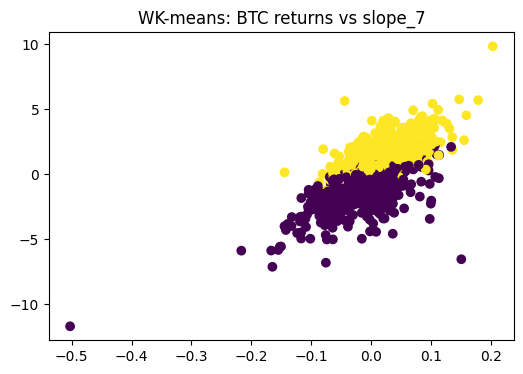

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=100, figsize=(6, 4))

axes.scatter(df_features['Returns'].values, 
            df_features['slope_7'].values,
            c=df_features['wk'].values)

axes.set_title('WK-means: BTC returns vs slope_7')
plt.show()

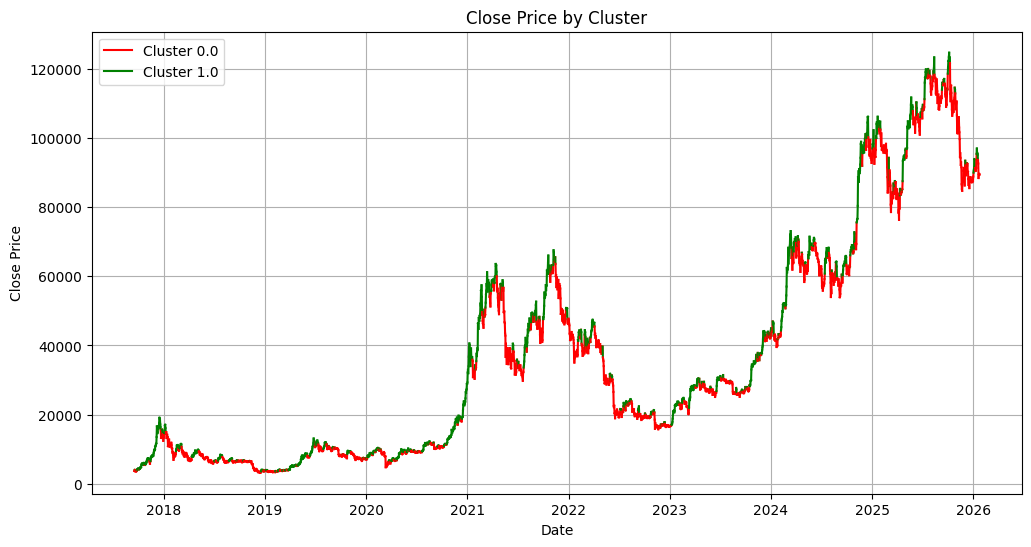

In [16]:
# Define colors for clusters
colors = {0.0: "red", 1.0: "green"}

plt.figure(figsize=(12,6))

# Iterate through consecutive points and draw line segments
for i in range(len(df)-1):
    x_vals = df.index[i:i+2]
    y_vals = df["Close"].iloc[i:i+2]
    cluster = df["cluster"].iloc[i]
    plt.plot(x_vals, y_vals, color=colors[cluster], linestyle="-")

plt.title("Close Price by Cluster")
plt.xlabel("Date")
plt.ylabel("Close Price")
# Add legend handles manually
for cluster, color in colors.items():
    plt.plot([], [], color=color, label=f"Cluster {cluster}")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- 1. Base continua (gris) ---
close_neutral = df['Close']

# --- 2. Series por cluster ---
colors = {0.0: "red", 1.0: "green"}
close_cluster = {}

for c in colors.keys():
    # Creamos máscara: el punto actual o el siguiente pertenece al cluster
    mask = (df['cluster'] == c) | (df['cluster'].shift(-1) == c)
    series = df['Close'].copy()
    series[~mask] = np.nan
    close_cluster[c] = series

# --- 3. Crear subplots ---
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.05,
    row_heights=[0.7, 0.3],
    subplot_titles=("Precio Multicolor por Cluster", "Cluster asignado")
)

# --- Panel superior: Precio ---
# Línea gris base
fig.add_trace(go.Scatter(
    x=df.index, y=close_neutral,
    mode='lines',
    line=dict(color='gray', width=1),
    name='Neutral',
    hoverinfo='skip'
), row=1, col=1)

# Líneas coloreadas por cluster
for c, series in close_cluster.items():
    fig.add_trace(go.Scatter(
        x=df.index, y=series,
        mode='lines',
        line=dict(color=colors[c], width=2.5),
        name=f"Cluster {c}",
        connectgaps=False
    ), row=1, col=1)

# --- Panel inferior: mostrar cluster como línea discreta ---
fig.add_trace(go.Scatter(
    x=df.index, y=df['cluster'],
    mode='lines',
    line=dict(color='cyan', width=1),
    name='Cluster'
), row=2, col=1)

# --- Layout ---
fig.update_layout(
    template='plotly_dark',
    height=700,
    title_text="Detector de Clusters Interactivo",
    hovermode="x unified",
    dragmode='zoom',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.update_xaxes(rangeslider_visible=False)

fig.show()

## Test

In [18]:
# Calcular el punto de corte (índice)
split_index = int(len(df) * 0.60)

# Dividir el DataFrame cronológicamente
train_data = df.iloc[:split_index]  # El 70% más antiguo para optimizar
test_data = df.iloc[split_index:]   # El 30% más reciente para validar

print(f"Datos de Entrenamiento: {len(train_data)} velas ({train_data.index[0].date()} a {train_data.index[-1].date()})")
print(f"Datos de Validación: {len(test_data)} velas ({test_data.index[0].date()} a {test_data.index[-1].date()})")

Datos de Entrenamiento: 1831 velas (2017-09-16 a 2022-09-20)
Datos de Validación: 1222 velas (2022-09-21 a 2026-01-24)


In [19]:
# Features computation
train_features = pd.DataFrame(index=train_data.index)
train_features = train_data[['Returns', 'slope_7','slope_14','slope_21','slope_30']]
train_features.dropna(inplace=True)

In [21]:
# Define dataset
dataset = train_features.values

# Run WK-mean
wkmeans = WKMeans(k=k)
wkmeans.fit(dataset)

# Predict cluster assignments
train_features['wk'] = wkmeans.predict(dataset)

In [ ]:
train_data['cluster'] = train_features['wk']
train_data.dropna(inplace=True)

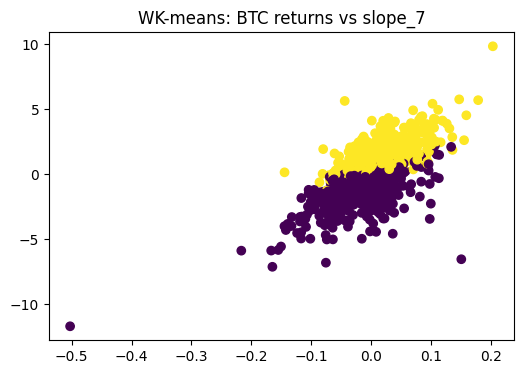

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=100, figsize=(6, 4))

axes.scatter(train_features['Returns'].values, 
            train_features['slope_7'].values,
            c=train_features['wk'].values)

axes.set_title('WK-means: BTC returns vs slope_7')
plt.show()

In [25]:
close_neutral = train_data['Close']

# --- 2. Series por cluster ---
colors = {0.0: "red", 1.0: "green"}
close_cluster = {}

for c in colors.keys():
    # Creamos máscara: el punto actual o el siguiente pertenece al cluster
    mask = (train_data['cluster'] == c) | (train_data['cluster'].shift(-1) == c)
    series = train_data['Close'].copy()
    series[~mask] = np.nan
    close_cluster[c] = series

# --- 3. Crear subplots ---
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.05,
    row_heights=[0.7, 0.3],
    subplot_titles=("Precio Multicolor por Cluster", "Cluster asignado")
)

# --- Panel superior: Precio ---
# Línea gris base
fig.add_trace(go.Scatter(
    x=train_data.index, y=close_neutral,
    mode='lines',
    line=dict(color='gray', width=1),
    name='Neutral',
    hoverinfo='skip'
), row=1, col=1)

# Líneas coloreadas por cluster
for c, series in close_cluster.items():
    fig.add_trace(go.Scatter(
        x=train_data.index, y=series,
        mode='lines',
        line=dict(color=colors[c], width=2.5),
        name=f"Cluster {c}",
        connectgaps=False
    ), row=1, col=1)

# --- Panel inferior: mostrar cluster como línea discreta ---
fig.add_trace(go.Scatter(
    x=train_data.index, y=train_data['cluster'],
    mode='lines',
    line=dict(color='cyan', width=1),
    name='Cluster'
), row=2, col=1)

# --- Layout ---
fig.update_layout(
    template='plotly_dark',
    height=700,
    title_text="Detector de Clusters Interactivo",
    hovermode="x unified",
    dragmode='zoom',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.update_xaxes(rangeslider_visible=False)

fig.show()

In [26]:
# Features computation
test_features = pd.DataFrame(index=test_data.index)
test_features = test_data[['Returns', 'slope_7','slope_14','slope_21','slope_30']]
test_features.dropna(inplace=True)

In [27]:
# Define dataset
dataset = test_features.values

# Predict cluster assignments
test_features['wk'] = wkmeans.predict(dataset)

In [28]:
test_data['cluster'] = test_features['wk']
train_data.dropna(inplace=True)

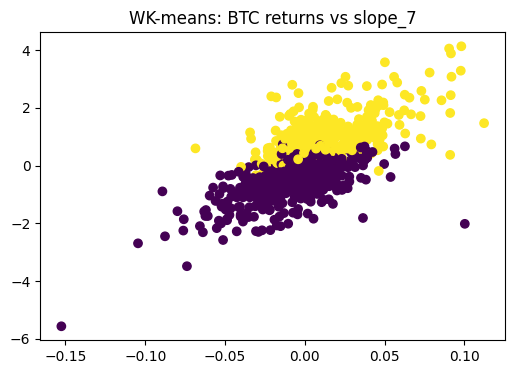

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=100, figsize=(6, 4))

axes.scatter(test_features['Returns'].values, 
            test_features['slope_7'].values,
            c=test_features['wk'].values)

axes.set_title('WK-means: BTC returns vs slope_7')
plt.show()

In [31]:
close_neutral = test_data['Close']

# --- 2. Series por cluster ---
colors = {0.0: "red", 1.0: "green"}
close_cluster = {}

for c in colors.keys():
    # Creamos máscara: el punto actual o el siguiente pertenece al cluster
    mask = (test_data['cluster'] == c) | (test_data['cluster'].shift(-1) == c)
    series = test_data['Close'].copy()
    series[~mask] = np.nan
    close_cluster[c] = series

# --- 3. Crear subplots ---
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.05,
    row_heights=[0.7, 0.3],
    subplot_titles=("Price by Cluster", "Assigned Cluster")
)

# --- Panel superior: Precio ---
# Línea gris base
fig.add_trace(go.Scatter(
    x=test_data.index, y=close_neutral,
    mode='lines',
    line=dict(color='gray', width=1),
    name='Neutral',
    hoverinfo='skip'
), row=1, col=1)

# Líneas coloreadas por cluster
for c, series in close_cluster.items():
    fig.add_trace(go.Scatter(
        x=test_data.index, y=series,
        mode='lines',
        line=dict(color=colors[c], width=2.5),
        name=f"Cluster {c}",
        connectgaps=False
    ), row=1, col=1)

# --- Panel inferior: mostrar cluster como línea discreta ---
fig.add_trace(go.Scatter(
    x=test_data.index, y=test_data['cluster'],
    mode='lines',
    line=dict(color='cyan', width=1),
    name='Cluster'
), row=2, col=1)

# --- Layout ---
fig.update_layout(
    template='plotly_dark',
    height=700,
    title_text="Market Regime Detector",
    hovermode="x unified",
    dragmode='zoom',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.update_xaxes(rangeslider_visible=False)

fig.show()

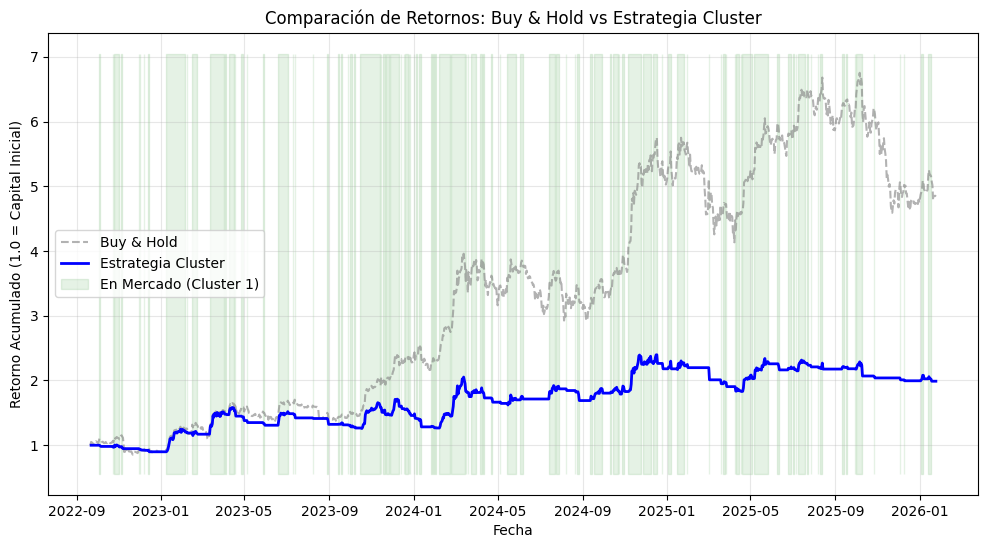

Retorno Total Buy & Hold: 384.08%
Retorno Total Estrategia: 98.89%

Últimos datos:
               Close  cluster  Signal   Returns  Strategy_Returns
Date                                                             
2026-01-20  88427.66        0     0.0 -0.045377              -0.0
2026-01-21  89454.73        0     0.0  0.011615               0.0
2026-01-22  89559.67        0     0.0  0.001173               0.0
2026-01-23  89600.26        0     0.0  0.000453               0.0
2026-01-24  89367.91        0     0.0 -0.002593              -0.0


In [36]:
df = test_data

df['Returns'] = df['Close'].pct_change()

# ---------------------------------------------------------
# 2. Lógica del Backtest
# ---------------------------------------------------------

# A) Buy and Hold
# Acumulamos el producto de (1 + retorno diario)
# fillna(0) es para manejar el primer dato que suele ser NaN
df['BH_Returns'] = df['Returns'].fillna(0)
df['BH_Cumulative'] = (1 + df['BH_Returns']).cumprod()

# B) Estrategia Cluster
# Lógica: Si hoy el cluster es 1, mantenemos para MAÑANA. 
# Por tanto, multiplicamos el retorno de HOY por el cluster de AYER.
df['Signal'] = df['cluster'].shift(1).fillna(0)

# Retorno de estrategia = Retorno Mercado * Señal (1 o 0)
df['Strategy_Returns'] = df['Returns'] * df['Signal']
df['Strategy_Cumulative'] = (1 + df['Strategy_Returns']).cumprod()

# ---------------------------------------------------------
# 3. Visualización y Métricas
# ---------------------------------------------------------

plt.figure(figsize=(12, 6))

# Graficar Buy and Hold
plt.plot(df.index, df['BH_Cumulative'], label='Buy & Hold', color='gray', alpha=0.6, linestyle='--')

# Graficar Estrategia Cluster
plt.plot(df.index, df['Strategy_Cumulative'], label='Estrategia Cluster', color='blue', linewidth=2)

# Colorear áreas donde estamos comprados (Cluster = 1)
# Usamos fill_between para resaltar cuándo la estrategia está activa
y_min, y_max = plt.ylim()
plt.fill_between(df.index, y_min, y_max, where=(df['cluster']==1), 
                 color='green', alpha=0.1, label='En Mercado (Cluster 1)')

plt.title('Comparación de Retornos: Buy & Hold vs Estrategia Cluster')
plt.xlabel('Fecha')
plt.ylabel('Retorno Acumulado (1.0 = Capital Inicial)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ---------------------------------------------------------
# 4. Resultados Numéricos
# ---------------------------------------------------------
total_return_bh = (df['BH_Cumulative'].iloc[-1] - 1) * 100
total_return_strat = (df['Strategy_Cumulative'].iloc[-1] - 1) * 100

print(f"Retorno Total Buy & Hold: {total_return_bh:.2f}%")
print(f"Retorno Total Estrategia: {total_return_strat:.2f}%")

# Ver las últimas filas para comprobar la lógica
print("\nÚltimos datos:")
print(df[['Close', 'cluster', 'Signal', 'Returns', 'Strategy_Returns']].tail())